In [1]:
# summary
# web : server-client : url
# requests, response : get, post

# 페이지 종류
# 동적 페이지 : URL 변화 없이 페이지 데이터 변경 : JSON > API
# 정적 페이지 : URL 변화 해서 페이지 데이터 변경 : HTML

# 동적 페이지 데이터 수집 프로세스
# 1. 웹서비스 분석(개발자 도구) : URL
# 2. requests(URL, parms, headers) > response(json) > JSON(str)
# 3. JSON(str) > list, dict > DataFrmae

# API를 이용한 데이터 수집
# 1. APP 등록 : application key
# 2. api 문서 : URL
# 2. requests(URL, parms, headers(application key)) > response(json) > JSON(str)
# 3. JSON(str) > list, dict > DataFrmae or Text

### 크롤링 정책
- robots.txt 파일에 크롤링 정책 설명 : 사이트 주소/robots.txt, https://www.ted.com/robots.txt 
- 크롤링에 대한 법적 재제 X
- 과도한 크롤링으로 서비스에 영향을 주었을때 문제가 될 수 있음
        - 영업방해, 지적재산권 침해
- 크롤링을 할때는 되도록 API를 사용
- 사례 : 잡코리아, 사람인 : 2008 ~ 2018

In [111]:
import pandas as pd
import requests, json
import matplotlib.pyplot as plt

In [55]:
# 1. application key

In [56]:
CLIENT_ID, CLIENT_SECRET = "NolYzvV_nveIfSGN0eys", "gBM0HfT_U4"

In [57]:
# 2. document : url, parems, headers

In [58]:
url = "https://openapi.naver.com/v1/datalab/search"

In [59]:
params = {
  "startDate": "2018-01-01",
  "endDate": "2022-07-31",
  "timeUnit": "month",
  "keywordGroups": [
    {
      "groupName": "트위터",
      "keywords": [
        "트위터",
        "트윗"
      ]
    },
    {
      "groupName": "페이스북",
      "keywords": [
        "페이스북",
        "페북"
      ]
    },
    {
      "groupName": "인스타그램",
      "keywords": [
        "인스타그램",
        "인스타"
      ]
    }
  ]
}

In [60]:
headers = {
    "X-Naver-Client-Id": CLIENT_ID,
    "X-Naver-Client-Secret": CLIENT_SECRET,
    "Content-Type": "application/json"
}

In [61]:
# 3. requests(url, params, headers) > response(json) : JSON(str)

In [62]:
response = requests.post(url, data=json.dumps(params), headers=headers)
response

<Response [200]>

In [66]:
response.text[:200]

'{"startDate":"2018-01-01","endDate":"2022-07-31","timeUnit":"month","results":[{"title":"트위터","keywords":["트위터","트윗"],"data":[{"period":"2018-01-01","ratio":14.59502},{"period":"2018-02-01","ratio":13'

In [26]:
# 4. JSON(str) > prepocessing > DataFrame

In [99]:
data = response.json()["results"]

In [92]:
# list comprehension : 간단한 for, if 문을 사용하여 리스트 데이터를 만들때 사용하는방법
# 0 ~ 9 까지 홀수만 제공해서 리스트 출력

result = []
for num in range(10):
    if num % 2:
        result.append(num **2)
result

[1, 9, 25, 49, 81]

In [123]:
result = [i**2  for i in range(10) if i % 2] # if 만 쓸때는 for문 뒤에
result

[1, 9, 25, 49, 81]

In [124]:
result = [i**2 if i % 2 else i for i in range(10) ] # if else 쓸때는 for문 전에
result

[0, 1, 2, 9, 4, 25, 6, 49, 8, 81]

In [96]:
len(data["results"][0]["data"])

55

In [103]:
period = [period["period"] for period in data[0]["data"]]
period[0]

'2018-01-01'

In [104]:
period = [data[0]["data"][i]["period"] for i in range(len(data[0]["data"]))]
period[0]

'2018-01-01'

In [108]:
df = pd.DataFrame({
    "date": [period["period"] for period in data[0]["data"]],
    "twitter": [ratio["ratio"] for ratio in data[0]["data"]],
    "facebook": [ratio["ratio"] for ratio in data[1]["data"]],
    "instagrem": [ratio["ratio"] for ratio in data[2]["data"]]
})
df.tail(2)

,date,twitter,facebook,instagrem
53,2022-06-01,23.24110,20.04381,21.63141
54,2022-07-01,24.06197,19.53712,21.40551


In [ ]:
# 5. visualization

<AxesSubplot:>

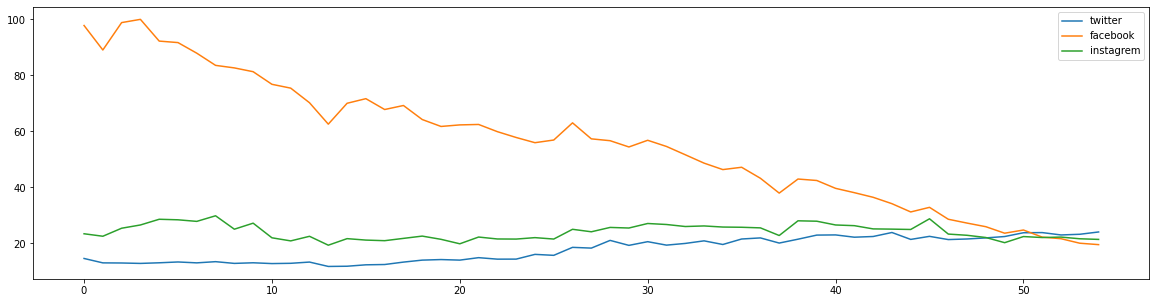

In [115]:
df.plot(figsize=(20, 5))

In [ ]:
# 과제 : 카카오 API 사용해서 주소 > 위도, 경도, 우편번호 또는 반대 API 사용